<a href="https://colab.research.google.com/github/SzymonNowakowski/Machine-Learning-2024/blob/master/Lab01_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 1 - PCA
### Author: Szymon Nowakowski

In this lab, we will conduct Principal Component Analysis (PCA) to identify a direction in feature space (a linear combination of features) that captures the maximum variance in the data.

We’ll explore the use of Singular Value Decomposition (SVD) as an efficient technique for performing PCA.

Next, we’ll implement Python code to demonstrate PCA and its applications.

# **Requirements for Passing the Lab Component**  
--------------------------------

The lab component of the course is structured into two main parts:

- **Statistical Learning** *(7 classes)*  
- **Neural Networks** *(7 classes)*  

### 📚 **Homework Assignments**  
- Each student needs to **register their GitHub repository** for this course.
- After each class, students will receive a **homework assignment**.  
- Each assignment has a **two-week deadline**.  
  - For example, if the class is held on **March 1st**, the homework is due by **midnight on March 15th**.  
  - **Exceptions:** The deadlines for the **last two classes** will be set separately, depending on the semester schedule.
- Each assignment solution must be a **Colab notebook** placed in the student's **GitHub repository** for this course.
- Each assignment solution must begin with an **“Open in Colab”** badge so it can be launched directly from GitHub.
- In your repository’s **README** add a **link** to the notebook.

### 🧮 **Scoring System**  
- Each homework assignment will be graded on a scale of **0, 1, or 2 points**.  
- The maximum possible score for the lab section is **28 points**.

### ✅ **Passing Criteria**  
To pass the lab component of the course, students must meet the following **minimum requirements**:

1. **Earn at least 2 points** for **7 homework assignments** in total.  
2. **Complete at least 3 assignments** with 2 points in **each part** (*Statistical Learning* and *Neural Networks*).

❗ **Failure to meet these criteria will result in not passing the lab component of the course.**

### 💻 **Retake Policy**  
- A **computer-based exam** will be held during the **resit session** (pl. *sesja poprawkowa*) for students who did not meet the passing criteria or want to improve their grades.




# Motivation for PCA
--------------------------------




## Data

Let's assume $X$ is an $n \times k$ matrix with our **data**. Let's further assume it is **centered**.

- Rows of $X$ are **observations** or **data points**, while
- Columns of $X$ are called **features**.

$$
X =
\begin{bmatrix}
x_{11} & x_{12} & \dots & x_{1k} \\
x_{21} & x_{22} & \dots & x_{2k} \\
\vdots & \vdots & \ddots & \vdots \\
x_{n1} & x_{n2} & \dots & x_{nk}
\end{bmatrix}
$$



## PCA

In PCA, our goal is to find a direction (a linear combination of features) that captures the maximum variance in the data.

- **Least Scattered View Along the Principal Component**: this direction can be understood as the direction along which the data points appear least scattered when viewed from that angle.

- **Direction of Maximum Variance**: alternatively—and equivalently, due to the Pythagorean theorem—when we project the data onto this direction, the spread (or variance) of the data is maximized.


## Our goal

Our goal is finding such a vector $w$, that the linear combination $X w$ has maximal variance:

$$
\text{Var}(X w) \longrightarrow \max_{\|w\| = 1}
$$

Obviously we restrict $w$ to normalized vectors.




## Inner Product as Projection Length

The first and foremost interpretation of $Xw$ is as a linear combination of columns of $X$. But it also can be understood as a projection of rows of $X$ onto the direction $w$. To help you visualise this concept, consider the following:

When we take the inner product of a vector $x$ with a normalized vector $w$, we’re effectively measuring its "shadow" or "projection" onto
$w$. The inner product is a scalar value. This scalar represents the length of
$x$ along the direction of $w$—essentially, how far $x$ extends in the
$w$ direction. So, the inner product $x \cdot w$ gives the **projection length**.

The projection itself would be thus $x_w$ = $(x \cdot w) w$.

The product
$X w$ **generalizes this concept**, projecting all rows (all data points) of
$X$ onto the line defined by
$w$.

<img src="https://github.com/SzymonNowakowski/Machine-Learning-2024/blob/master/inner_product_as_projection_length.png?raw=1" alt="inner product is a projection length" width="400" height="400">


## How do we maximize $\text{Var}(X w)$?



To calculate the sample covariance matrix $C$ from our centered matrix $X$, we use the formula:

$$
C = \text{Var}(X) = \frac{1}{n - 1} X^T X
$$

$C$ is the $ k \times k $ sample covariance matrix. Since $C$ is symmetric, it can be decomposed as $C = V \Lambda V^T$, where
- $V$ is an orthonormal $ k \times k $ matrix. Its columns are **eigenvectors** of $C$,
- $\Lambda = \text{diag}(\lambda_1, \lambda_2, \dots, \lambda_k)$ is a diagonal $ k \times k $ matrix containing the **eigenvalues** of $C, \lambda_1 \geq \lambda_2 \geq \dots \geq \lambda_k$.

Because $V$ is orthonormal, we have $V V^T = V^T V = I_k$, where $I_k$ is the identity matrix.

Recall, we want to maximize:
$$
\text{Var}(X w) \longrightarrow \max_{\|w\| = 1}
$$

$$
\text{Var}(X w) = w^T \text{Var}(X) w = w^T C w = w^T V \Lambda V^T w \overset{\omega := V^T w}{=} \omega^T \Lambda \omega = \sum_{i=1}^k \lambda_i \omega_i^2,
$$
where $\| \omega \| = 1$.

### The maximizer

How do we maximize $\text{Var}(X w)$? We choose $\hat \omega = (1, 0, 0, \ldots, 0)^T$ as a maximizer, with $\hat \omega_1 =1$ and all other $\hat \omega_i =0$.

**Maximal variance** is then given by $\lambda_1$, the maximal eigenvalue.

Now let's find a corresponding $\hat w$.

$\hat w = I_k \cdot \hat w = V V^T \hat w \overset{\omega = V^T w}{=} V \hat \omega = V \cdot (1, 0, 0, \ldots, 0)^T = V_{\cdot 1}$  

### The First Principal Component

We have shown that the maximizer $\hat w$, **the First Principal Component** of $X$, is the first column of $V$ (or **the first eigenvector** of $C$), with the **variance** given by its **first eigenvalue**.

### The Next Principal Components

It is not covered by this material, but the **next eigenvectors** of $C$ (or columns of $V$) are the next principal components with their **variance** given by their **corresponding eigenvalues**. Note, that the principal components are mutually orthogonal (they come from an orthonormal matrix).



## Singular Value Decomposition - full form

Any $n \times k$ matrix, $X$ included, can be decomposed as

$$
X= U \Sigma V^T
$$

- $U, V$ ortonormal matrices, $n\times n$ and $k \times k$, respectively
- $\Sigma$ is an $n \times k$ matrix of diagonal **singular values** $\sigma_1 \geq \sigma_2 \geq \dots \geq \sigma_{\min(k,n)} \geq 0$
filled with additional zeros at the bottom or right:
$$
\Sigma =
\begin{bmatrix}
\sigma_1 & 0 & \dots & 0 \\
0 & \sigma_2 & \dots & 0 \\
\vdots & \vdots & \ddots & \vdots \\
0 & 0 & \dots & \sigma_k \\
0 & 0 & \dots & 0 \\
\vdots & \vdots & \ddots & \vdots \\
0 & 0 & \dots & 0 \\
\end{bmatrix} \quad\text{or}\quad
\Sigma =
\begin{bmatrix}
\sigma_1 & 0 & \dots & 0 & 0 & \dots & 0 \\
0 & \sigma_2 & \dots & 0 & 0 & \dots & 0 \\
\vdots & \vdots & \ddots & \vdots & \vdots & \ddots & \vdots \\
0 & 0 & \dots & \sigma_n & 0 & \dots & 0 \\
\end{bmatrix}
$$

In any case, $\Sigma ^ 2 = \Sigma^T \Sigma$ is an $k \times k$ diagonal matrix:

$$
\Sigma ^ 2 = \Sigma^T \Sigma =
\begin{bmatrix}
\sigma_1^2 & 0 & \dots & 0 \\
0 & \sigma_2^2 & \dots & 0 \\
\vdots & \vdots & \ddots & \vdots \\
0 & 0 & \dots & \sigma_k^2 \\
\end{bmatrix}\quad \text{or} \quad
\Sigma ^ 2 = \Sigma^T \Sigma =
\begin{bmatrix}
\sigma_1^2 & 0 & \dots & 0 & 0 & \dots & 0 \\
0 & \sigma_2^2 & \dots & 0 & 0 & \dots & 0 \\
\vdots & \vdots & \ddots & \vdots & \vdots & \ddots & \vdots \\
0 & 0 & \dots & \sigma_n^2 & 0 & \dots & 0 \\
0 & 0 & \dots & 0 & 0 & \dots & 0 \\
\vdots & \vdots & \ddots & \vdots & \vdots & \ddots & \vdots \\
0 & 0 & \dots & 0 & 0 & \dots & 0 \\
\end{bmatrix}
$$

**We shall work with the first case, as typically $n>k$.**





## Singular Value Decomposition - reduced form (used in practice, can be skipped now)

Every $n \times k$ matrix or rank $r$, $X$ included, can be decomposed as

$$
X= U_r \Sigma_r V_r^T
$$


- $U_r$ has $r$ first columns from $U$ ($U_r$ is $n \times r$). Its rows are truncated normalized vectors, thus they are not necessarily normalized. Thus, $U_r^T U_r = I_r$, but $U_r U_r^T \ne I_n$ (in general).

  Even for full rank $X$, usually $n>k$ and thus $n>r$ and thus $U_r \ne U$.
- $V_{r}$ has $r$ first columns from $V$ ($V_r$ is $k \times r$). Its rows are truncated normalized vectors, thus they are not necessarily normalized. Thus, $V_r^T V_r = I_r$, but $V_r V_r^T \ne I_k$ (in general).

  However, for full rank $X$, $k=r$ (if we assume $n>k$ as is generally the case) and then $V_r$ = $V$.

- $\Sigma_{r}=\text{diag}(\sigma_1, \sigma_2, \dots, \sigma_r)$ is a diagonal $ r \times r $ matrix containing the **singular values** $\sigma_1 \geq \sigma_2 \geq \dots \geq \sigma_r > 0$.


## Going back to full form SVD

Recall,
$$
C = \frac{1}{n - 1} X^T X
$$
but we want to have C decomposed as
$$
C = V \Lambda V^T
$$

Now, using the SVD of X
$$
C = \frac{1}{n - 1} V \Sigma^T U^T U \Sigma V^T = V \frac{\Sigma ^ 2}{n - 1} V^T
$$

Do they look similar?

Recall, **we didn't need to calculate $C$ in this**. All was required was the SVD of $X$, i.e. a constatation that $X= U \Sigma V^T$, to get
- principal components in columns of $V$,
- variance values $\lambda_i = \frac{\sigma_i ^ 2}{n - 1}$,
- also, $XV = U \Sigma V^T V = U \Sigma$, so we get very cheaply the projected data $XV$.
  
  (due to the special diagonal form of the $\Sigma$ matrix, the $U \Sigma$ multiplication is computationally simpler than the $XV$ multipication)



# SVD in Python
--------------------------------

Note, that the function `np.linalg.svd()` (which we will use) returns the last matrix $V$ already transposed in $X= U \Sigma V^T$, hence we'll call it `VT`.

In [44]:
import numpy as np

# Define a sample matrix Z. It is 3 x 2
X = np.array([[3, 1], [1, 3], [4, 2]])
print("3x2 matrix X:")
print(X)

# Perform Singular Value Decomposition
U, Sigma, VT = np.linalg.svd(X)
print("\nLeft singular vectors (3x3 U matrix):")
print(U)
print("\nSingular values (Sigma diagonal):")
print(Sigma)

# Convert Sigma into a full diagonal matrix
Sigma_full = np.zeros((X.shape[0], X.shape[1]))
np.fill_diagonal(Sigma_full, Sigma)
print("\nCorresponding Sigma in a 3x2 matrix form:")
print(Sigma_full)
print("\nRight singular vectors (2x2 VT matrix):")
print(VT)

print("\nChecks:")
print("\n1. Is U orthogonal?")
print(U.T @ U)
print(U @ U.T)
print("\n2. Is V orthogonal?")
print(VT.T @ VT)
print(VT @ VT.T)




# Reconstruct X
X_reconstructed = U @ Sigma_full @ VT
print("\n3. Reconstructed X?")
print(X_reconstructed)




3x2 matrix X:
[[3 1]
 [1 3]
 [4 2]]

Left singular vectors (3x3 U matrix):
[[-0.51469197  0.37397069 -0.77151675]
 [-0.4188805  -0.89483496 -0.15430335]
 [-0.74808509  0.24375463  0.6172134 ]]

Singular values (Sigma diagonal):
[5.93561675 2.18367896]

Corresponding Sigma in a 3x2 matrix form:
[[5.93561675 0.        ]
 [0.         2.18367896]
 [0.         0.        ]]

Right singular vectors (2x2 VT matrix):
[[-0.83484109 -0.55049101]
 [ 0.55049101 -0.83484109]]

Checks:

1. Is U orthogonal?
[[1.00000000e+00 2.12730042e-17 1.12505638e-16]
 [2.12730042e-17 1.00000000e+00 3.62085758e-18]
 [1.12505638e-16 3.62085758e-18 1.00000000e+00]]
[[ 1.00000000e+00 -4.96419415e-17  9.23231419e-17]
 [-4.96419415e-17  1.00000000e+00 -3.48807064e-17]
 [ 9.23231419e-17 -3.48807064e-17  1.00000000e+00]]

2. Is V orthogonal?
[[ 1.00000000e+00 -4.58014641e-18]
 [-4.58014641e-18  1.00000000e+00]]
[[1.00000000e+00 4.58014641e-18]
 [4.58014641e-18 1.00000000e+00]]

3. Reconstructed X?
[[3. 1.]
 [1. 3.]
 [4. 2

## Wine dataset

1. Import and examine wine dataset using `sklearn.datasets.load_wine()`.
2. Compute PCA using the SVD method.
3. Plot the data projected on the first 2 principal components.

In [45]:
import sklearn.datasets
import pandas as pd

# Load the wine dataset
data = sklearn.datasets.load_wine()
X = data.data
y = data.target
target_names = data.target_names

# Convert to DataFrame to easily inspect column names, types, and rows
df = pd.DataFrame(X, columns=data.feature_names)

# Print column names
print("Column Names:")
print(df.columns)

# Print column types
print("\nColumn Types:")
print(df.dtypes)

# Display the first 5 rows
print("\nFirst 5 Rows:")
print(df.head())


# Count occurrences of each class in y
print("\nCounts of each class in y:")
unique, counts = np.unique(y, return_counts=True)
class_counts = dict(zip(unique, counts))
print(class_counts)
print("Overall length:", len(y))

Column Names:
Index(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline'],
      dtype='object')

Column Types:
alcohol                         float64
malic_acid                      float64
ash                             float64
alcalinity_of_ash               float64
magnesium                       float64
total_phenols                   float64
flavanoids                      float64
nonflavanoid_phenols            float64
proanthocyanins                 float64
color_intensity                 float64
hue                             float64
od280/od315_of_diluted_wines    float64
proline                         float64
dtype: object

First 5 Rows:
   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.

In [46]:
# First, center X
X = X - np.mean(X, axis=0)

# And standardize it (it is always a good practice, so each dimension is treated as equally important)
X = X / np.std(X, axis=0)

# Perform Singular Value Decomposition
U, Sigma, VT = np.linalg.svd(X)

# Convert Sigma into a full diagonal matrix
Sigma_full = np.zeros((X.shape[0], X.shape[1]))
np.fill_diagonal(Sigma_full, Sigma)

variance_estimators = (Sigma ** 2) / (X.shape[0] - 1)

XV = U @ Sigma_full

print("\nVT, having the principal components in rows\n")
print(VT)

print("\nX projected on V (first 5 rows)\n")
print(XV[:5,:])
print("\nVariance estimators\n")
print(variance_estimators)
print("\nExplained percentage variance\n")
print(variance_estimators / sum(variance_estimators))
print("\nCumulative explained percentage variance\n")
print(np.cumsum(variance_estimators / sum(variance_estimators)))



VT, having the principal components in rows

[[-0.1443294   0.24518758  0.00205106  0.23932041 -0.14199204 -0.39466085
  -0.4229343   0.2985331  -0.31342949  0.0886167  -0.29671456 -0.37616741
  -0.28675223]
 [-0.48365155 -0.22493093 -0.31606881  0.0105905  -0.299634   -0.06503951
   0.00335981 -0.02877949 -0.03930172 -0.52999567  0.27923515  0.16449619
  -0.36490283]
 [-0.20738262  0.08901289  0.6262239   0.61208035  0.13075693  0.14617896
   0.1506819   0.17036816  0.14945431 -0.13730621  0.08522192  0.16600459
  -0.12674592]
 [-0.0178563   0.53689028 -0.21417556  0.06085941 -0.35179658  0.19806835
   0.15229479 -0.20330102  0.39905653  0.06592568 -0.42777141  0.18412074
  -0.23207086]
 [ 0.26566365 -0.03521363  0.14302547 -0.06610294 -0.72704851  0.14931841
   0.10902584  0.50070298 -0.13685982  0.07643678  0.17361452  0.10116099
   0.1578688 ]
 [-0.21353865 -0.53681385 -0.15447466  0.10082451 -0.03814394  0.0841223
   0.01892002  0.25859401  0.53379539  0.41864414 -0.10598274 -0.2

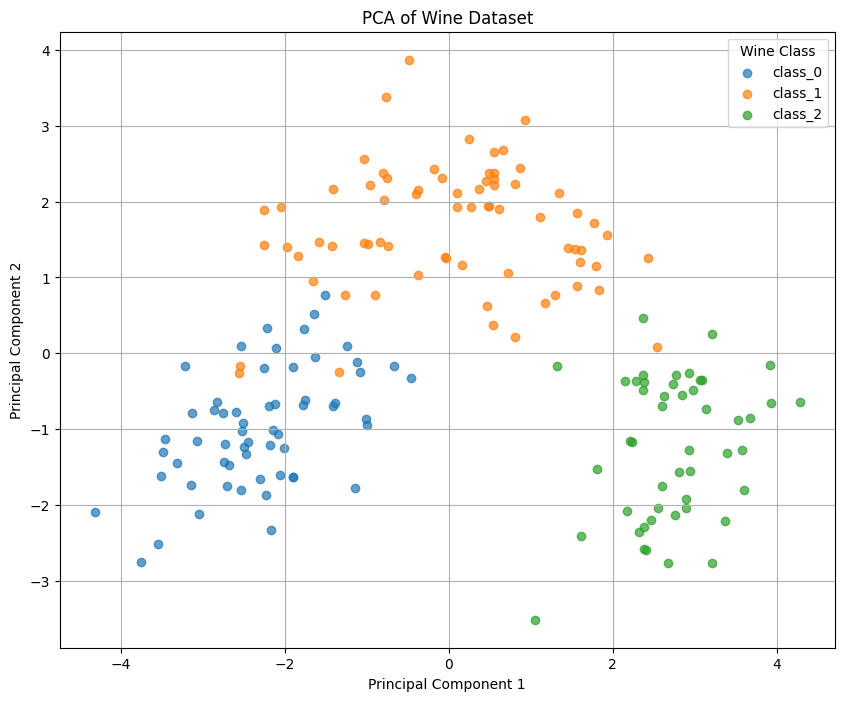

In [47]:
import matplotlib.pyplot as plt

# Plot the PCA results with color coding by wine class
plt.figure(figsize=(10, 8))
for i, target_name in enumerate(target_names):
    plt.scatter(XV[y == i, 0], XV[y == i, 1], label=target_name, alpha=0.7)

plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA of Wine Dataset")
plt.legend(title="Wine Class")
plt.grid(True)
plt.show()

### Now, the same with the use of standard PCA libraries


the principal components in rows

[[ 0.1443294  -0.24518758 -0.00205106 -0.23932041  0.14199204  0.39466085
   0.4229343  -0.2985331   0.31342949 -0.0886167   0.29671456  0.37616741
   0.28675223]
 [ 0.48365155  0.22493093  0.31606881 -0.0105905   0.299634    0.06503951
  -0.00335981  0.02877949  0.03930172  0.52999567 -0.27923515 -0.16449619
   0.36490283]]

X projected on V (first 5 rows)

[[ 3.31675081  1.44346263]
 [ 2.20946492 -0.33339289]
 [ 2.51674015  1.0311513 ]
 [ 3.75706561  2.75637191]
 [ 1.00890849  0.86983082]]

Explained percentage variance

[0.36198848 0.1920749 ]

Cumulative explained percentage variance

[0.36198848 0.55406338]


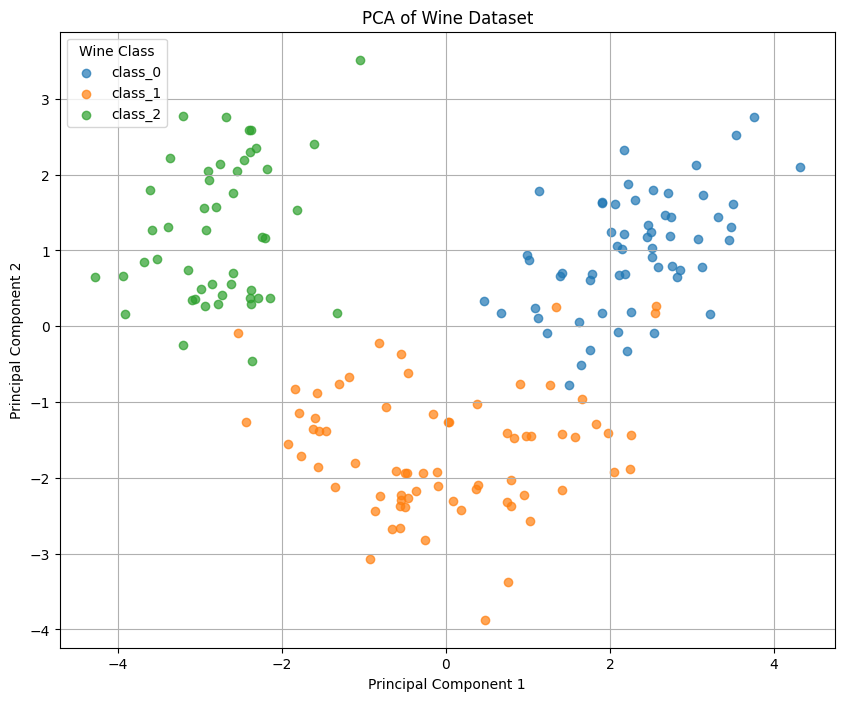

In [48]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Load the wine dataset
data = sklearn.datasets.load_wine()
X = data.data
y = data.target
target_names = data.target_names


# Center and standardize the data before applying PCA
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Perform PCA and reduce the data to 2 components for visualization
pca = PCA(n_components = 2)
XV = pca.fit_transform(X)

print("\nthe principal components in rows\n")
print(pca.components_)

print("\nX projected on V (first 5 rows)\n")
print(XV[:5,:])
print("\nExplained percentage variance\n")
print(pca.explained_variance_ratio_)
print("\nCumulative explained percentage variance\n")
print(np.cumsum(pca.explained_variance_ratio_))

# Plot the PCA results with color coding by wine class
plt.figure(figsize=(10, 8))
for i, target_name in enumerate(target_names):
    plt.scatter(XV[y==i, 0], XV[y==i, 1], label=target_name, alpha=0.7)

plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA of Wine Dataset")
plt.legend(title="Wine Class")
plt.grid(True)
plt.show()


Note that the principal components are determined up to a sign. In our two computations (using SVD and the `sklearn` library), $PC2$ appeared with a different sign.

## Olivetti faces dataset examples

PCA can be effectively applied to images.

For RGB images with dimensions $H \times W$, we have $H \times W \times 3$ features due to the three color channels.

For grayscale images of size $H \times W$, we have $H \times W$ features, as there is only one intensity value per pixel. In the case of the Olivetti faces dataset, each image is $64 \times 64$ pixels, resulting in 4096 features. However, only a few of the principal components are needed to reconstruct the images with acceptable quality.


### Examine the faces

Overall number of faces: 400


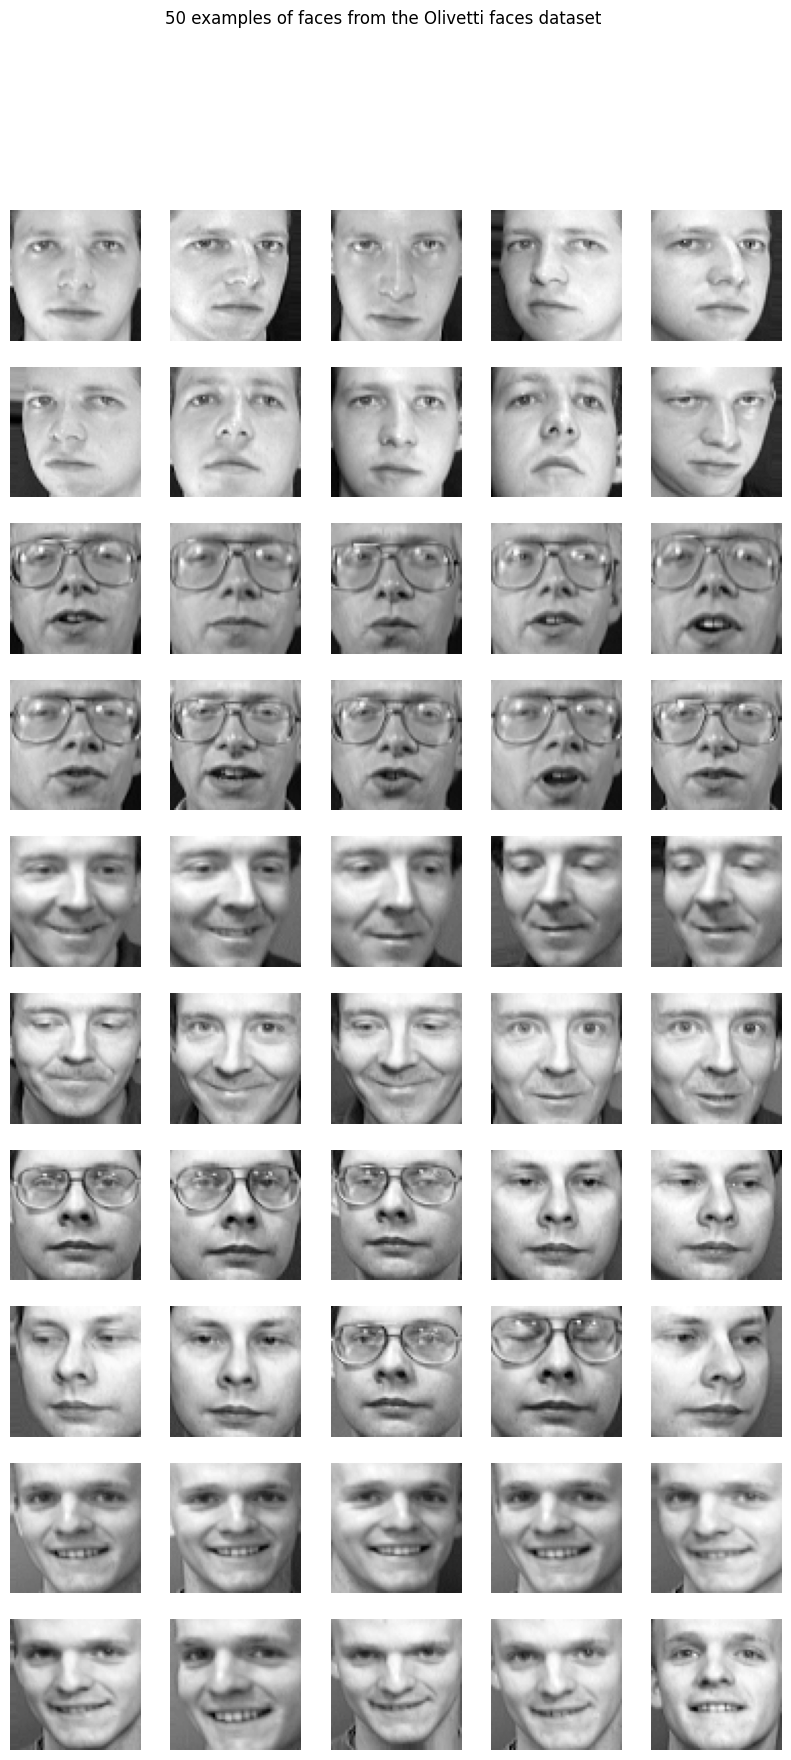

{'data': array([[0.30991736, 0.3677686 , 0.41735536, ..., 0.15289256, 0.16115703,
         0.1570248 ],
        [0.45454547, 0.47107437, 0.5123967 , ..., 0.15289256, 0.15289256,
         0.15289256],
        [0.3181818 , 0.40082645, 0.49173555, ..., 0.14049587, 0.14876033,
         0.15289256],
        ...,
        [0.5       , 0.53305787, 0.607438  , ..., 0.17768595, 0.14876033,
         0.19008264],
        [0.21487603, 0.21900827, 0.21900827, ..., 0.57438016, 0.59090906,
         0.60330576],
        [0.5165289 , 0.46280992, 0.28099173, ..., 0.35950413, 0.3553719 ,
         0.38429752]], dtype=float32),
 'images': array([[[0.30991736, 0.3677686 , 0.41735536, ..., 0.37190083,
          0.3305785 , 0.30578512],
         [0.3429752 , 0.40495867, 0.43801653, ..., 0.37190083,
          0.338843  , 0.3140496 ],
         [0.3429752 , 0.41735536, 0.45041323, ..., 0.38016528,
          0.338843  , 0.29752067],
         ...,
         [0.21487603, 0.20661157, 0.2231405 , ..., 0.15289256,
     

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import sklearn.datasets
import pandas as pd


# Load the Olivetti faces dataset
data = sklearn.datasets.fetch_olivetti_faces()
faces = data.images  # Original 64x64 images
X = data.data        # Flattened images (each image is 64x64 pixels, flattened to 4096 features)
print("Overall number of faces:", len(X))
# Display 50 example faces from the dataset in 10 rows, 5 faces per row
fig, ax = plt.subplots(10, 5, figsize=(10, 20))
for i in range(50):
    row = i // 5  # Determine the row index
    col = i % 5   # Determine the column index
    ax[row, col].imshow(faces[i], cmap='gray')
    ax[row, col].axis('off')
plt.suptitle("50 examples of faces from the Olivetti faces dataset")
plt.show()


data

### Examine the principal components

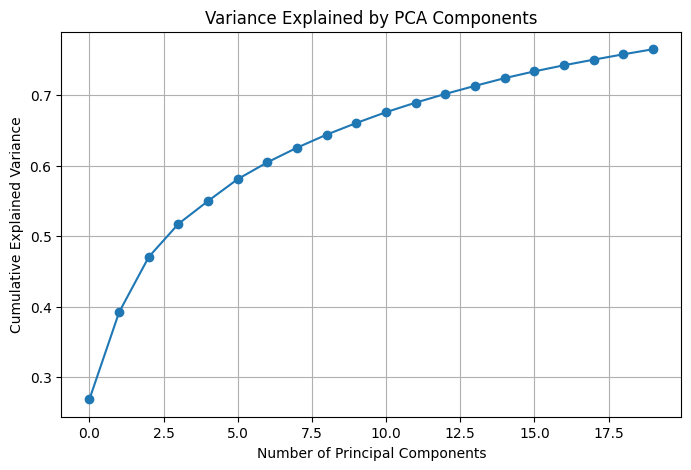

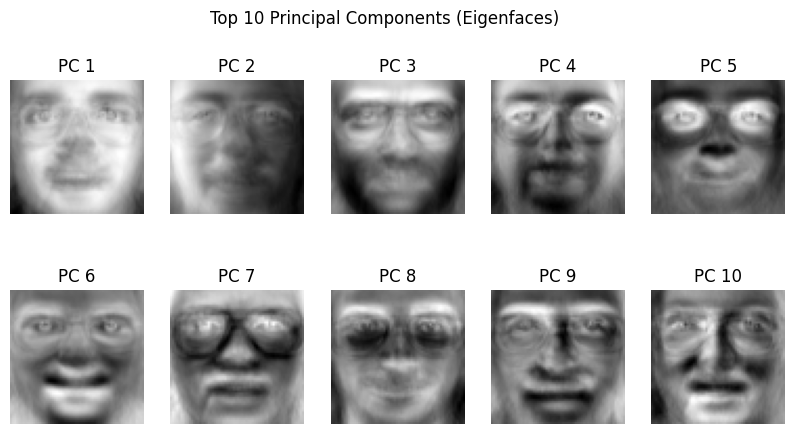

In [50]:


# Standardize the data (important for PCA)
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Perform PCA to reduce the dimensions
n_components = 400  # Number of principal components to retain
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X)

# Show the cumulative variance explained by the components
plt.figure(figsize=(8, 5))
plt.plot(np.cumsum(pca.explained_variance_ratio_[:20]), marker='o')
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Variance Explained by PCA Components")
plt.grid(True)
plt.show()

# Visualize the principal components (eigenfaces)
eigenfaces = pca.components_.reshape((n_components, 64, 64))

fig, ax = plt.subplots(2, 5, figsize=(10, 5))
for i in range(10):
    ax[i // 5, i % 5].imshow(eigenfaces[i], cmap='gray')
    ax[i // 5, i % 5].set_title(f"PC {i+1}")
    ax[i // 5, i % 5].axis('off')
plt.suptitle("Top 10 Principal Components (Eigenfaces)")
plt.show()



### Reconstruct faces using a subset of principal components

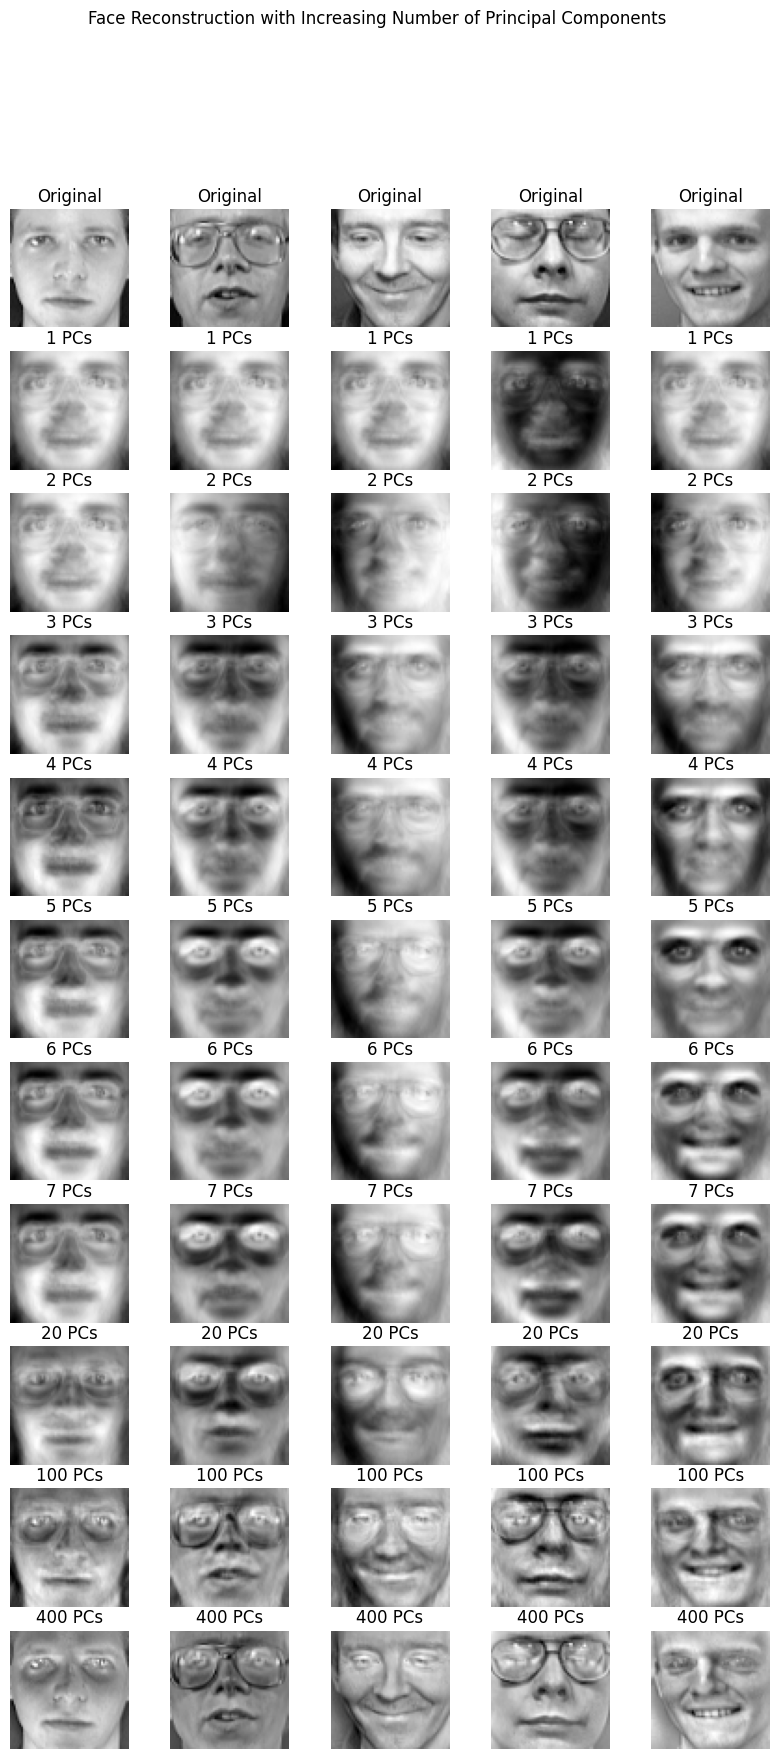

In [51]:
interesting_faces = [0, 10, 27, 38, 40]

# Reconstruct example faces using only a subset of components
n_components_to_show = [1, 2, 3, 4, 5, 6, 7, 20, 100, 400]  # Number of components for reconstruction
fig, ax = plt.subplots(len(n_components_to_show) + 1, 5, figsize=(10, 20))



# Original faces on top row
for i in range(5):
    ax[0, i].imshow(faces[interesting_faces[i]], cmap='gray')
    ax[0, i].set_title("Original")
    ax[0, i].axis('off')

# Reconstructed faces using increasing numbers of components
for j, n_comp in enumerate(n_components_to_show, 1):

    # Copy the first n_comp components from X_pca, setting the rest to zero
    X_reduced = np.zeros_like(X_pca)
    X_reduced[:, :n_comp] = X_pca[:, :n_comp]
    X_reconstructed = pca.inverse_transform(X_reduced)


    for i in range(5):
        ax[j, i].imshow(X_reconstructed[interesting_faces[i]].reshape(64, 64), cmap='gray')
        ax[j, i].set_title(f"{n_comp} PCs")
        ax[j, i].axis('off')

plt.suptitle("Face Reconstruction with Increasing Number of Principal Components")
plt.show()

## MNIST dataset


MNIST images are greyscale, too. They are 28 by 28, making it 784 features to begin with.

Dataset length: 70000


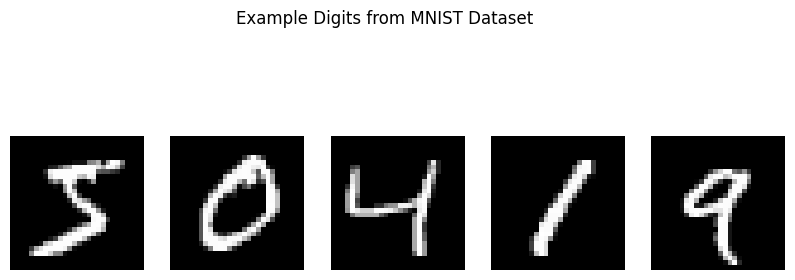

In [56]:

from matplotlib.cm import get_cmap

# Load the MNIST dataset
mnist = sklearn.datasets.fetch_openml("mnist_784", version=1)
X = mnist.data.values / 255.0  # Normalize pixel values to [0, 1]
y = mnist.target.astype(int)
print("Dataset length:", len(y))

# Display a few example digits from the dataset
fig, ax = plt.subplots(1, 5, figsize=(10, 4))
for i in range(5):
    ax[i].imshow(X[i].reshape(28, 28), cmap='gray')
    ax[i].axis('off')
plt.suptitle("Example Digits from MNIST Dataset")
plt.show()



### Perform the PCA and visualise it a bit

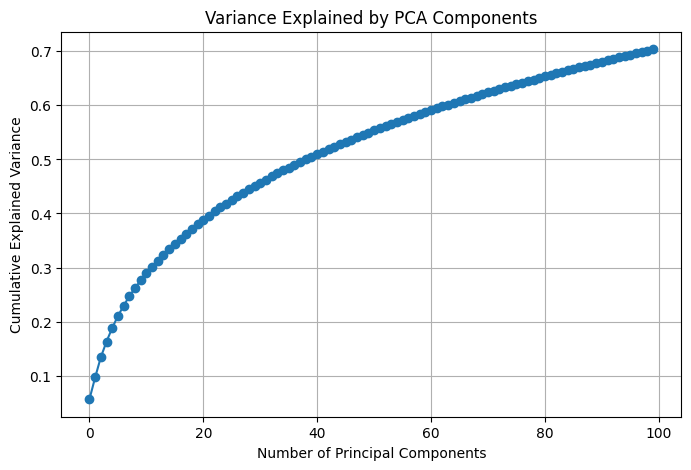

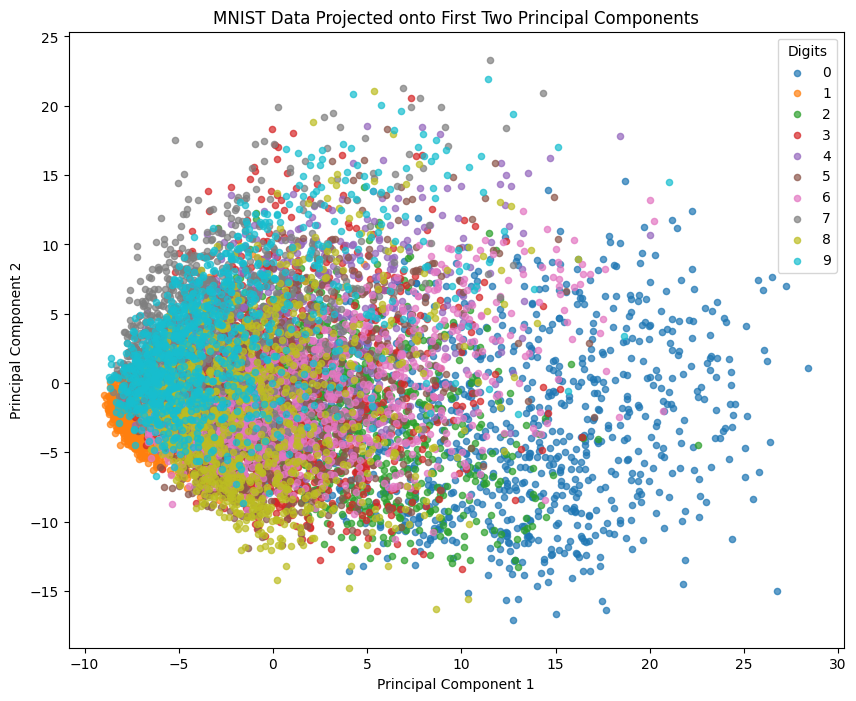

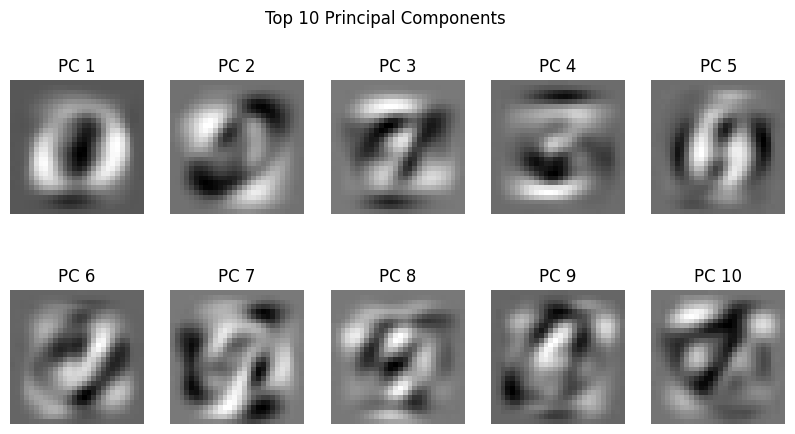

In [57]:
# Standardize the data (important for PCA)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform PCA to reduce the dimensions
n_components = 100  # Number of principal components to retain
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X_scaled)

# Show the cumulative variance explained by the components
plt.figure(figsize=(8, 5))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Variance Explained by PCA Components")
plt.grid(True)
plt.show()

# Visualize the data in the first 2 principal components

# Define a color map with distinct colors
cmap = plt.colormaps["tab10"]    # "tab10" provides 10 distinct colors

plt.figure(figsize=(10, 8))
for i in range(10):
    subset = X_pca[y == i]  # Select only the digits of the current class
    plt.scatter(subset[:1000, 0], subset[:1000, 1], label=str(i), color=cmap(i), alpha=0.7, s=20)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Digits")
plt.title("MNIST Data Projected onto First Two Principal Components")
plt.show()

# Visualize the principal components
eigendigits = pca.components_.reshape((n_components, 28, 28))

fig, ax = plt.subplots(2, 5, figsize=(10, 5))
for i in range(10):
    ax[i // 5, i % 5].imshow(eigendigits[i], cmap='gray')
    ax[i // 5, i % 5].set_title(f"PC {i+1}")
    ax[i // 5, i % 5].axis('off')
plt.suptitle("Top 10 Principal Components")
plt.show()



### Reconstruct the digits

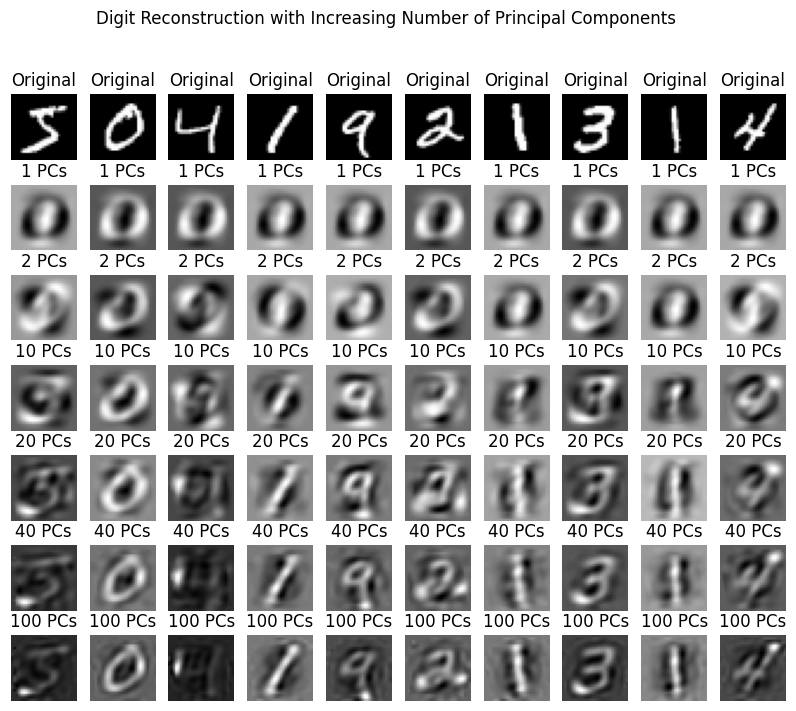

In [62]:
# Reconstruct example digits using a subset of components
n_components_to_show = [1, 2, 10, 20, 40, 100]  # Number of components for reconstruction
fig, ax = plt.subplots(len(n_components_to_show) + 1, 10, figsize=(10, 8))

# Original digits on top row
for i in range(10):
    ax[0, i].imshow(X[i].reshape(28, 28), cmap='gray')
    ax[0, i].set_title("Original")
    ax[0, i].axis('off')

# Reconstructed digits using increasing numbers of components
for j, n_comp in enumerate(n_components_to_show, 1):

    # Copy the first n_comp components from X_pca, setting the rest to zero
    X_reduced = np.zeros_like(X_pca)
    X_reduced[:, :n_comp] = X_pca[:, :n_comp]
    X_reconstructed = pca.inverse_transform(X_reduced)

    for i in range(10):
        ax[j, i].imshow(X_reconstructed[i].reshape(28, 28), cmap='gray')
        ax[j, i].set_title(f"{n_comp} PCs")
        ax[j, i].axis('off')

plt.suptitle("Digit Reconstruction with Increasing Number of Principal Components")
plt.show()


# **Homework Assignment: Principal Component Analysis (PCA) on 3D Clustered Data**

-------------------------------

You are provided with a dataset containing 3-dimensional data points from three distinct classes. The dataset can be downloaded from the following link:

**[PCA Three Clusters Dataset](https://github.com/SzymonNowakowski/Machine-Learning-2024/blob/master/PCA_three_clusters_data.csv)**

Each data point is represented by three continuous features $(x, y, z)$ and belongs to one of three clusters.

## **Primary Question**

**Perform PCA on the provided dataset to find the two principal components and visualize the data in a 2D plot using these components.**

- Compare this PCA plot with the following 2D plots of the original data:
  - $x$ vs. $y$
  - $x$ vs. $z$
  - $y$ vs. $z$

**Does PCA improve the separation of data points from different clusters compared to the original feature spaces? Explain why.**



## **Secondary Question**

Remember: before applying PCA, **standardize** the data so that each feature has a mean of 0 and a variance of 1.

**Why is standardization necessary before applying PCA?**

- Reflect on how differences in scale among features can impact the principal component directions.

## **Task & Deliverables**

1. **Colab Notebook**  
   - Create a **Colab notebook** that:
     - Performs PCA on the dataset and visualizes the first two principal components in a 2D scatter plot.
     - Includes separate 2D scatter plots for the original feature pairs: $(x, y)$, $(x, z)$, and $(y, z)$.
     - Clearly **answers** both the **primary** and **secondary** questions.
     - Uses Python code to perform PCA, standardize the data, and generate the required plots.
   - To answer the primary question, you may consider creating additional visualizations or charts beyond those listed above. For example, some students might choose to explore a 3D plot of the data. Feel free to experiment with different approaches.

2. **Publish on GitHub**  
   - Place the Colab notebook in your **GitHub repository** for this course.
   - In your repository’s **README**, add a **link** to the notebook and include an **“Open in Colab”** badge in your notebook, so it can be launched directly from GitHub.




